In [1]:
import ref_index as RF
from os.path import exists
from numba import jit
import matplotlib.pylab as plt
from scipy.interpolate import UnivariateSpline
from hapi import *
import requests as R
import numpy as np
from scipy.interpolate import CubicSpline, RectBivariateSpline
%matplotlib widget
#


@jit(nopython=True)
def gauss(x, fwhm):
    sigma = fwhm/2./np.sqrt(2*np.log(2.))
    return (np.exp(-(x*x/2/sigma/sigma))/sigma/np.sqrt(2*np.pi))


Kb = 1.380649e-23  # J/K Boltzmans constant
h = 6.626176e-34  # Plancks constant
AMU = 1.6603145e-27
C = 299792458.  # m/s. Speed of light in vacuo


HAPI version: 1.2.2.0
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2021 are now available in HAPI code

           MIT license: Copyright 2021 HITRAN team, see more at http://hitran.org. 

           If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005

           ATTENTION: This is the core version of the HITRAN Application Programming Interface.
                      For more efficient implementation of the absorption coefficient routine, 
                      as well as for new profiles, parameters and other functional,
      

In [2]:
print("Before, figure default size is: ", plt.rcParams["figure.figsize"])
plt.rcParams["figure.figsize"] = (7, 5)
print("After, figure default size is: ", plt.rcParams["figure.figsize"])


Before, figure default size is:  [6.4, 4.8]
After, figure default size is:  [7.0, 5.0]


In [3]:
db_begin('Abanddata')
if not exists('./Abanddata/oxygen2.header'):

    fetch_by_ids('oxygen', [36], 1/776e-7, 1/749e-7)
c2 = 1.4387770  # CM K


Using Abanddata

oxygen
                     Lines parsed: 199

Data is fetched from http://hitran.org

BEGIN DOWNLOAD: oxygen
  65536 bytes written to Abanddata/oxygen.data
Header written to Abanddata/oxygen.header
END DOWNLOAD
                     Lines parsed: 199
PROCESSED


In [4]:
url = "http://129.16.35.2:8080/msis/2019-02-02T12:00:00/70/130/150"
#url = "http://83.252.31.240:59059/msis/2019-06-20T12:00:00/80/130/150"
url = "http://129.16.35.2:8080/msis/2019-12-02T12:00:00/0/130/150"
#url = "http://129.16.35.2:8080/msis/2019-03-14T12:00:00/0/130/150" # update for Feb
url = "http://129.16.35.2:8080/msis/2019-02-17T12:00:00/0/130/150" # update for Feb
url = "http://129.16.35.2:8080/msis/2019-03-17T12:00:00/0/130/150" # update for MAr
url = "http://129.16.35.2:8080/msis/2019-03-17T17:30:00/0/130/150" # update for Mar evenign



atm = R.get(url).json()
N = np.array(atm['n2'])+np.array(atm['o2'])+np.array(atm['o'])
pres = N*Kb*atm['T']
atm['p'] = pres
z = np.array(atm['z'])
o2 = np.array(atm['o2'])/1e6  # to cm-3
T = atm['T']


In [5]:
select('oxygen', ParameterNames=('nu', 'sw', 'local_iso_id', 'a', 'elower', 'gp', 'gpp'),
       Conditions=('==', 'global_upper_quanta', ('STR', ('       b      0'))),
       DestinationTableName='tmp')
nu, sw, iso, a, elow, gp, gpp = np.array(getColumns(
    'tmp', ['nu', 'sw', 'local_iso_id', 'a', 'elower', 'gp', 'gpp']))

for i in range(a.shape[0]):
    a[i] *= abundance(7, iso[i])
    sw[i] *= abundance(7, iso[i])
eup = elow+nu
1e8/min(nu), 1e8/max(nu), min(nu), max(nu)


(7756.231169079724, 7496.700669612073, 12892.859666, 13339.201391)

/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.figure.savefig(buf, format='png', dpi='figure')
/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.figure.savefig(buf, format='png', dpi='figure')
/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.figure.savefig(buf, format='png', dpi='figure')
/home/waves/anaconda3/envs/MATS_

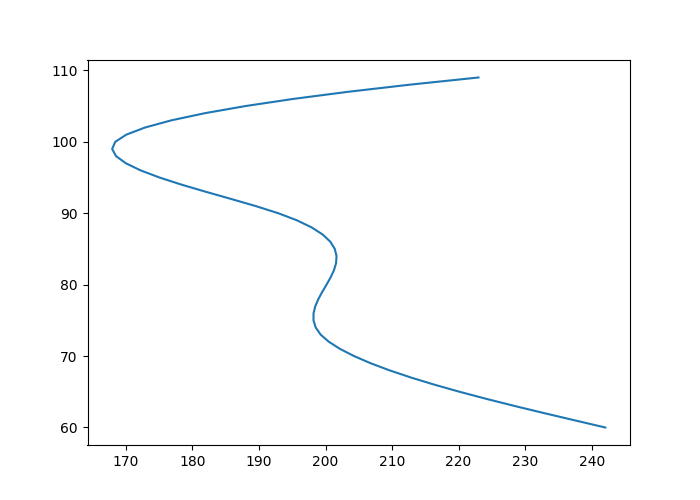

Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 1.2000000476837158, 'type': 'set_device_pixel_ratio'}


In [6]:
plt.figure()
plt.plot(T[60:110],z[60:110])
#plt.plot(T1[60:110],z[60:110])

/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.figure.savefig(buf, format='png', dpi='figure')
/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.figure.savefig(buf, format='png', dpi='figure')
/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.figure.savefig(buf, format='png', dpi='figure')
/home/waves/anaconda3/envs/MATS_

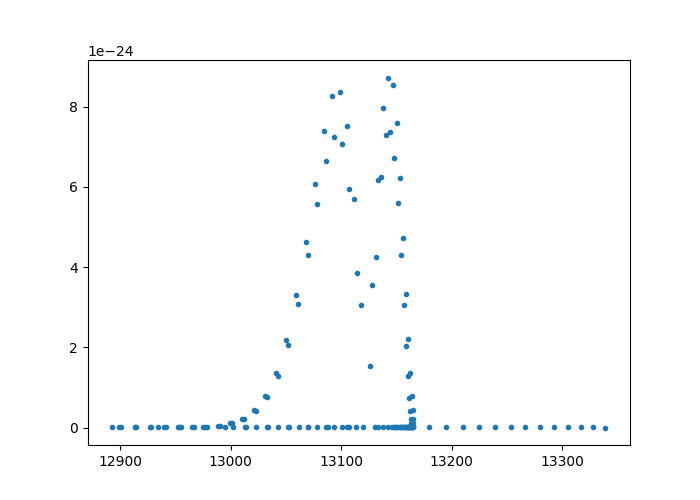

Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 1.2000000476837158, 'type': 'set_device_pixel_ratio'}


In [7]:
plt.figure()
plt.plot(nu, sw, '.')


In [8]:
Dfwhm = nu*2/C * np.sqrt(2*Kb*298.*np.log(2)/32/AMU)
grid = np.arange(12950, 13200, 0.002)
grid = np.arange(12800, 13400, 0.002)
sigma = np.zeros([len(z), len(grid)])
emission = np.zeros([len(z), len(grid)])
for layer in range(len(z)):
    print('layer number = {}'.format(layer))
    Sjlayer = sw*298/T[layer]*np.exp(1.439*elow*(T[layer]-298)/298/T[layer])
    intens = gp*a*np.exp(-c2*eup/T[layer])*nu*nu
    intens /= intens.sum()
    DfwhmLayer = Dfwhm*np.sqrt(T[layer]/298.)
    for i in range(len(nu)):
        sigma[layer, :] += (Sjlayer[i]*gauss(grid-nu[i], DfwhmLayer[i]))
        emission[layer, :] += (intens[i]*gauss(grid-nu[i], DfwhmLayer[i]))


layer number = 0
layer number = 1
layer number = 2
layer number = 3
layer number = 4
layer number = 5
layer number = 6
layer number = 7
layer number = 8
layer number = 9
layer number = 10
layer number = 11
layer number = 12
layer number = 13
layer number = 14
layer number = 15
layer number = 16
layer number = 17
layer number = 18
layer number = 19
layer number = 20
layer number = 21
layer number = 22
layer number = 23
layer number = 24
layer number = 25
layer number = 26
layer number = 27
layer number = 28
layer number = 29
layer number = 30
layer number = 31
layer number = 32
layer number = 33
layer number = 34
layer number = 35
layer number = 36
layer number = 37
layer number = 38
layer number = 39
layer number = 40
layer number = 41
layer number = 42
layer number = 43
layer number = 44
layer number = 45
layer number = 46
layer number = 47
layer number = 48
layer number = 49
layer number = 50
layer number = 51
layer number = 52
layer number = 53
layer number = 54
layer number = 55
la

In [9]:
#np.save('o2AbandsigmaDec0N0-150', sigma)
#np.save('o2AbandemissionDec0N0-150', emission)

np.save('o2AbandsigmaMar1730-0N0-150', sigma)
np.save('o2AbandemissionMar1730-0N0-150', emission)

print('saved!')


saved!


In [10]:
#sigma = np.load('o2AbandsigmaDec0N0-150.npy')
#emission = np.load('o2AbandemissionDec0N0-150.npy')

sigma = np.load('o2AbandsigmaMar1730-0N0-150.npy')
emission = np.load('o2AbandemissionMar1730-0N0-150.npy')

print('loaded!')


loaded!


In [11]:
@jit(nopython=True, cache=True)
def path_z(z_top, z_t, sol_zen, nsteps):
    Re = 6375.  # km
    sol_zen /= 180/np.pi
    B = np.arcsin((Re+z_t) * np.sin(np.pi-sol_zen)/(Re+z_top))
    S_top = np.sin(sol_zen-B)*(Re+z_top)/np.sin(np.pi-sol_zen)

    Ret2 = (Re + z_t)**2
    step = S_top/nsteps
    S_top_half = S_top - step/2
    z_step = [np.sqrt(Ret2 + (S_top_half - i*step)**2 - 2*(Re + z_t) *
                      (S_top_half - i*step)*np.cos(np.pi-sol_zen))-Re for i in range(nsteps)]
    return (z_step, step)


/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.figure.savefig(buf, format='png', dpi='figure')
/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.figure.savefig(buf, format='png', dpi='figure')
/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.figure.savefig(buf, format='png', dpi='figure')
/home/waves/anaconda3/envs/MATS_

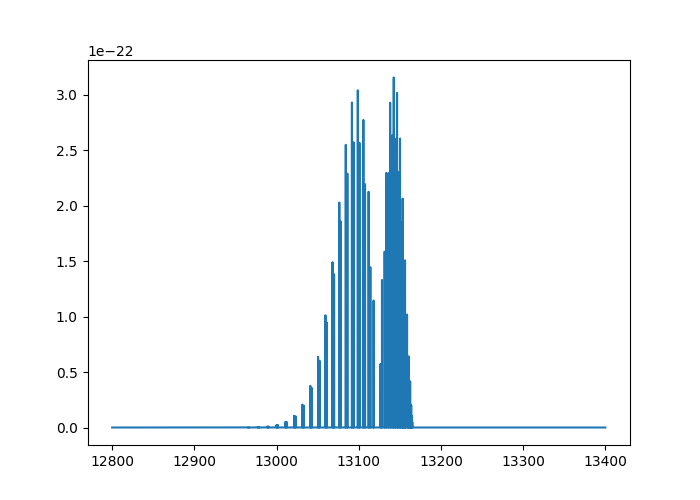

In [12]:
plt.figure()
#plt.plot(grid[45500:46500],sigma[50, 45500:46500].T,grid[45500:46500],sigma2[50, 45500:46500].T)
plt.plot(grid,sigma[50,:])

In [13]:
deltaz = np.diff(z).mean()
for i in range(emission.shape[0]):
    emission[i, :] /= emission[i, :].sum()
emissum = emission[-1, :].sum()
print(emissum)
no_steps = 100
tanheights = np.arange(30, 120, 5)
taus = np.zeros((sigma.shape[1], 2*no_steps-1, len(tanheights)))
i = 0
path_steps = []
factor = []

for tanz in tanheights:
    z_paths, path_step = path_z(z[-1], tanz, 90.0, no_steps)
    path_steps.append(path_step)
    z_paths.extend(z_paths[-2::-1])
    zi = np.floor((np.array(z_paths)-z[0])/deltaz).astype(int)
    #emissum = emission[zi, :].sum()/no_steps/2
    tau = (sigma[zi, :].T*(np.exp(np.interp(z_paths, z, np.log(o2))))
           ).cumsum(axis=1)*path_step * 1e5
    taus[:, :, i] = tau
    factor.append(((np.exp(-taus[:, :, i])*emission[zi, :].T)).sum(0)/emissum)
    i += 1


0.9999999999999997


/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.figure.savefig(buf, format='png', dpi='figure')
/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.figure.savefig(buf, format='png', dpi='figure')
/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.figure.savefig(buf, format='png', dpi='figure')
/home/waves/anaconda3/envs/MATS_

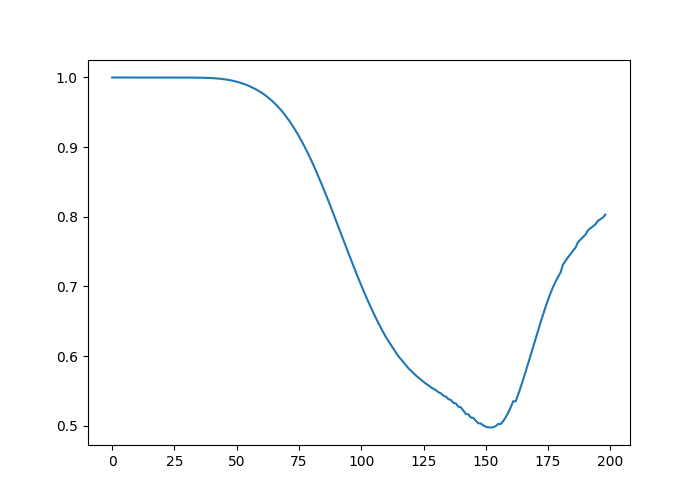

Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 1.2000000476837158, 'type': 'set_device_pixel_ratio'}


In [15]:
plt.figure()
plt.plot(factor[10])

In [ ]:
i = 2
testtest=(filters @ (np.exp(-taus[:, :, i])*emission[zi, :].T))/emissum


plt.figure()


plt.plot(testtest.T)

In [16]:
IR1=np.loadtxt('F-N-IR1-ABandCenter_transmission_air_6degr.dat',skiprows=1,unpack=True)
IR2=np.loadtxt('F-N-IR2-ABandTotal_air_6degr.dat',skiprows=1,unpack=True)
#IR3=np.loadtxt('MATS-analysis/Donal/retrievals/Datafiles/F-N-IR3-BgShort_transmission_air_6degr.dat',skiprows=1,unpack=True)
#IR4=np.loadtxt('MATS-analysis/Donal/retrievals/Datafiles/F-N-IR4-BgLong_transmission_air_6degr.dat',skiprows=1,unpack=True)
#convert from wavelength in air to wavelength in vacupe

IR1[0,:]=RF.air2vac(IR1[0,:])
IR2[0,:]=RF.air2vac(IR2[0,:])
IR1[1,:]/=100
IR2[1,:]/=100
#IR3[1,:]/=100
#IR4[1,:]/=100
filter1=np.interp(grid, 1e7/IR1[0,-1::-1],IR1[1,-1::-1],left=0,right=0)
filter2=np.interp(grid, 1e7/IR2[0,-1::-1],IR2[1,-1::-1],left=0,right=0)
filters=np.vstack([filter1,filter2])

# filters ok

In [17]:
deltaz = np.diff(z).mean()
for i in range(emission.shape[0]):
    emission[i, :] /= emission[i, :].sum() # normalise (full band) emissions
emissum = emission[-1, :].sum() 
print(emissum) # check that = one
no_steps = 100
tanheights = np.arange(30, 120, 5)
taus = np.zeros((sigma.shape[1], 2*no_steps-1, len(tanheights))) # 'allocate'
i = 0
path_steps = []
factor = []
logo2=np.log(o2)
for tanz in tanheights:
    z_paths, path_step = path_z(z[-1], tanz, 90.0, no_steps)
    path_steps.append(path_step)
    z_paths.extend(z_paths[-2::-1])
    zi = np.floor((np.array(z_paths)-z[0])/deltaz).astype(int)
    emissum = filters @ emission[zi, :].T # generate filtered radiances (sum wavelength)
    tau = (sigma[zi, :].T*(np.exp(np.interp(z_paths, z, logo2)))
           ).cumsum(axis=1)*path_step * 1e5
    taus[:, :, i] = tau
    #emissions=np.array([emission[zi,:].T/emissum[0,:],emission[zi,:].T/emissum[1,:]]) 
    emissions=np.array([emission[zi,:].T,emission[zi,:].T]) 
    
    factor.append((filters@(np.exp(-taus[:, :, i])*emissions))) 
    i += 1



1.0


In [ ]:
    #factor.append((filters@(np.exp(-taus[:, :, i])*emission[zi, :].T))/emissum)

In [ ]:
plt.figure()
plt.plot((emission[zi,:].T/emissum[0,:]).sum(axis=0))


In [ ]:
filters@np.exp(-taus[:, :, 16])

In [ ]:
i = 0
(filters@(np.exp(-taus[:, :, i])*emission[zi, :].T)/emissum).shape

In [ ]:
#plt.figure()


factors= np.array(factor)
factors.shape

#emissions.shape

In [ ]:
plt.figure()
plt.plot(factors[:,0,:])

In [ ]:
factors.shape

Text(0.5, 1.0, 'Absorption and IR1/IR2')

/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.figure.savefig(buf, format='png', dpi='figure')
/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.figure.savefig(buf, format='png', dpi='figure')
/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.figure.savefig(buf, format='png', dpi='figure')
/home/waves/anaconda3/envs/MATS_

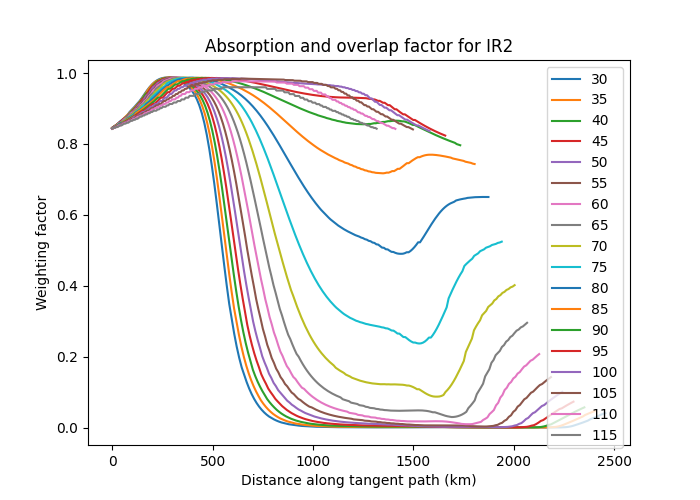

/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.figure.savefig(buf, format='png', dpi='figure')
/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.figure.savefig(buf, format='png', dpi='figure')
/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.figure.savefig(buf, format='png', dpi='figure')
/home/waves/anaconda3/envs/MATS_

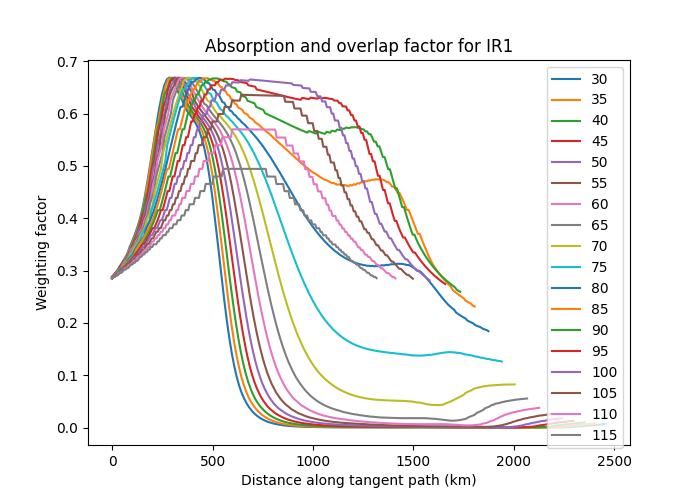

/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.figure.savefig(buf, format='png', dpi='figure')
/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.figure.savefig(buf, format='png', dpi='figure')
/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.figure.savefig(buf, format='png', dpi='figure')
/home/waves/anaconda3/envs/MATS_

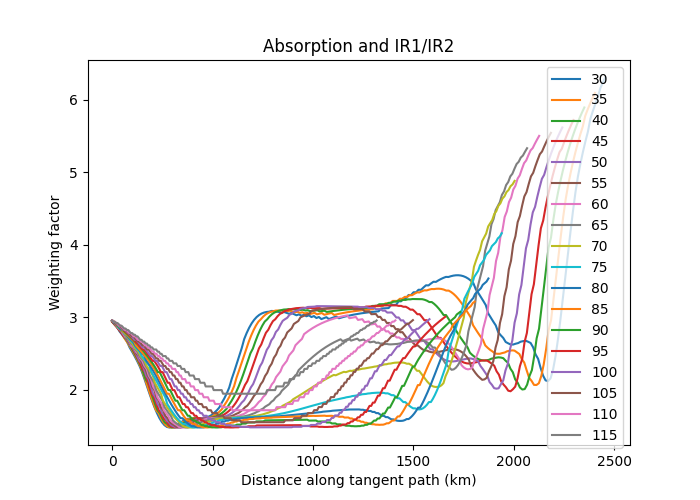

In [18]:
factors= np.array(factor)
plt.figure(figsize=(7, 5))
#plt.plot(np.array([np.arange(2*no_steps-1) *
#         p for p in path_steps]).T, np.array(factors[:,0,1,:]).T)

plt.plot(np.array([np.arange(2*no_steps-1) *
         p for p in path_steps]).T, np.array(factors[:,0,1,:]).T)

plt.legend(tanheights)
plt.xlabel('Distance along tangent path (km)')
plt.ylabel('Weighting factor')
plt.title('Absorption and overlap factor for IR2')
plt.figure(figsize=(7, 5))
plt.plot(np.array([np.arange(2*no_steps-1) *
         p for p in path_steps]).T, np.array(factors[:,1,0,:]).T)
plt.legend(tanheights)
plt.xlabel('Distance along tangent path (km)')
plt.ylabel('Weighting factor')
plt.title('Absorption and overlap factor for IR1')

plt.figure(figsize=(7, 5))
plt.plot(np.array([np.arange(2*no_steps-1) *
         p for p in path_steps]).T,
         (np.array(factors[:,0,1,:]).T)/(np.array(factors[:,1,0,:]).T))
plt.legend(tanheights)
plt.xlabel('Distance along tangent path (km)')
plt.ylabel('Weighting factor')
plt.title('Absorption and IR1/IR2')




/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.figure.savefig(buf, format='png', dpi='figure')
/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.figure.savefig(buf, format='png', dpi='figure')
/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.figure.savefig(buf, format='png', dpi='figure')
/home/waves/anaconda3/envs/MATS_

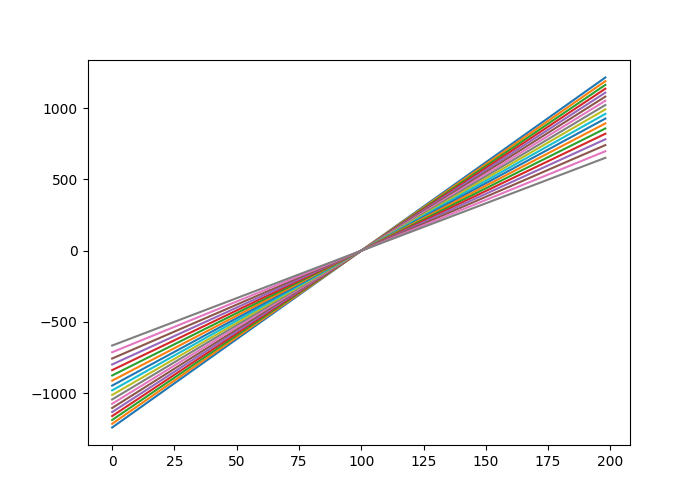

Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 1.2000000476837158, 'type': 'set_device_pixel_ratio'}


In [19]:
distances = np.array([np.arange(2*no_steps-1) *
                      p for p in path_steps]).T
distances -= distances[100, :]
plt.figure()
plt.plot(distances-distances[100, :])
splinedcorr = [] 
for i in range(len(tanheights)): 
    splinedcorr.append(CubicSpline(distances[:, i], np.log(factors[i,1,0,:]))) # IR1
    #splinedcorr.append(CubicSpline(distances[:, i], np.log(factors[i,0,1,:]))) # IR2
    #splinedcorr.append(CubicSpline(distances[:, i], np.log(factors[i,0,0,:]/factors[i,1,1,:]))) # fraction

In [20]:
factors.T.shape

(199, 2, 2, 18)

(0.0, 10.0)

/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.figure.savefig(buf, format='png', dpi='figure')
/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.figure.savefig(buf, format='png', dpi='figure')
/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.figure.savefig(buf, format='png', dpi='figure')
/home/waves/anaconda3/envs/MATS_

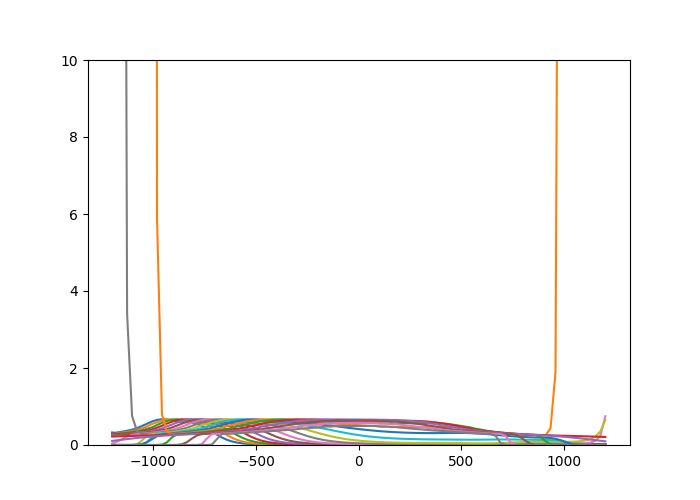

Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 1.2000000476837158, 'type': 'set_device_pixel_ratio'}


In [21]:
testdist = np.linspace(-1200, 1200, 100)
plt.figure()
corrfactor = np.zeros([len(testdist), len(tanheights)])
for i in range(len(tanheights)):
    corrfactor[:, i] = (splinedcorr[i](testdist))
plt.plot(testdist, np.exp(corrfactor))
plt.ylim([0, 10])


(0.0, 1.0)

/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.figure.savefig(buf, format='png', dpi='figure')
/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.figure.savefig(buf, format='png', dpi='figure')
/home/waves/anaconda3/envs/MATS_img/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.figure.savefig(buf, format='png', dpi='figure')
/home/waves/anaconda3/envs/MATS_

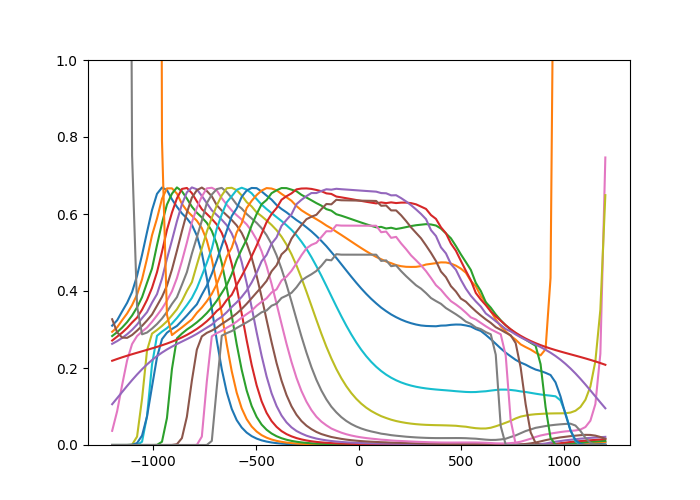

Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 1.2000000476837158, 'type': 'set_device_pixel_ratio'}


In [22]:
spline2dlogfactor = RectBivariateSpline(tanheights, testdist, corrfactor.T)
plt.figure()
plt.plot(testdist, np.exp(spline2dlogfactor(tanheights, testdist)).T)
plt.ylim([0, 1])


In [23]:
#np.save('splinedlogfactorsIR1IR2.npy', [tanheights, splinedcorr])
#np.save('splined2dlogfactorsIR1IR2.npy', spline2dlogfactor)

np.save('splinedlogfactorsIR1_mar1730_new.npy', [tanheights, splinedcorr])
np.save('splined2dlogfactorsIR1_mar1730_new.npy', spline2dlogfactor)


In [ ]:
tanz = 30
no_steps = 300
z_paths, path_step = path_z(z[-1], tanz, 90.0, no_steps)
print('Path step = ', path_step)
z_paths.extend(z_paths[-2::-1])
zi = np.floor((np.array(z_paths)-z[0])/deltaz).astype(int)
tau = (sigma[zi, :].T*(np.exp(np.interp(z_paths, z, np.log(o2))))
       ).cumsum(axis=1)*path_step * 1e5


In [ ]:
plt.figure()
plt.plot(path_step*np.arange(2*no_steps-1),
         (np.exp(-tau)*emission[zi, :].T).sum(0)/emissum)
plt.xlabel('Distance along tangent path (km)')
plt.ylabel('Weighting factor')
plt.legend(tanheights)


In [ ]:
onefilter=np.ones([filters.shape[1]])
plt.figure()
#plt.plot(np.exp(-taus[:, -1, :]).mean(axis=0), tanheights)
plt.plot((onefilter @ np.exp(-taus[:, -1, :])).T/onefilter.sum(), tanheights)
plt.plot(((filters @ np.exp(-taus[:, -1, :])).T/filters.sum(axis=1)), tanheights)
plt.xlabel('Transmission')
plt.ylabel('Tangent height (km)')
plt.title(
    'Limb transmission in the {:.1f} - {:.1f} nm region'.format(1e7/grid[-1], 1e7/grid[0]))
plt.ylim([55, 115])
plt.legend(['full','IR1','IR2'])
#plt.xlim([0.85, 1])


In [ ]:
onefilter

In [ ]:
plt.figure()
plt.plot(np.exp(-taus[::10,-1,:]))
#np.exp(-taus[::10,-1,:])
#np.min(taus[:,-1,:])

In [ ]:
filters.shape

In [ ]:
taus.shape


In [ ]:
1/0.005


In [ ]:
taus = []


In [ ]:
np.array(factor).shape


In [ ]:
np.array([np.arange(2*no_steps-1)*p for p in path_steps]).shape


In [ ]:
Dfwhm = nu*2/C * np.sqrt(2*Kb*298.*np.log(2)/32/AMU)
grid = np.arange(12800, 13400, 0.002)
sigma = np.zeros([len(z), len(grid)])
for i in range(z.shape[0]):
    htabs = absorptionCoefficient_Voigt(SourceTables='tmp', Environment={
                                        "p": pres[i]/101300, "T": T[i]}, OmegaGrid=grid)
    sigma[i, :] = htabs[1]


In [ ]:
plt.figure()
plt.plot(grid, htabs[1], grid, sigma[1])


In [ ]:
select('oxygen',
       Conditions=('==', 'global_upper_quanta', ('STR', ('       b      0'))),
       DestinationTableName='tmp')
nu, sw, gamma, nair, iso, a, elow, gp, gpp = np.array(getColumns(
    'tmp', ['nu', 'sw', 'gamma_air', 'n_air', 'local_iso_id', 'a', 'elower', 'gp', 'gpp']))

for i in range(a.shape[0]):
    a[i] *= abundance(7, iso[i])
    sw[i] *= abundance(7, iso[i])
eup = elow+nu
1e7/min(nu), 1e7/max(nu), min(nu), max(nu)


In [ ]:
Dfwhm = nu*2/C * np.sqrt(2*Kb*298.*np.log(2)/32/AMU)
grid = np.arange(12950, 13200, 0.002)
grid = np.arange(12800, 13400, 0.002)
sigma2 = np.zeros([len(z), len(grid)])
emission2 = np.zeros([len(z), len(grid)])
for layer in range(len(z)):
    print('layer number = {}'.format(layer))
    Sjlayer = sw*298/T[layer]*np.exp(1.439*elow*(T[layer]-298)/298/T[layer])
    intens = gp*a*np.exp(-c2*eup/T[layer])*nu*nu
    intens /= intens.sum()
    DfwhmLayer = Dfwhm*np.sqrt(T[layer]/298.)
    gammaLayer = gamma*pres[layer]/101300*(298/T[layer])**nair
    print('doppler {} Pressure {}'.format(DfwhmLayer[10]/2, gammaLayer[10]))
    winglimit = 1000
    for i in range(len(nu)):
        wing = np.max((winglimit*gammaLayer[i], winglimit*DfwhmLayer[i]/2))
        bl = bisect(grid, nu[i]-wing)
        bu = bisect(grid, nu[i]+wing)
        sigma2[layer, bl:bu] += (Sjlayer[i]*PROFILE_VOIGT(nu[i],
                                 DfwhmLayer[i]/2, gammaLayer[i], 0, grid[bl:bu]))
        emission2[layer, bl:bu] += (intens[i]*PROFILE_VOIGT(nu[i],
                                    DfwhmLayer[i]/2, gammaLayer[i], 0, grid[bl:bu]))


In [ ]:
nu[0], nu[-1]


In [ ]:
np.save('o2A-bandVoightsigmaDec0N0-150', sigma2)
np.save('o2A-bandVoightemissionDec0N0-150', emission2)

In [ ]:
layer = 1
pres[layer]


#### 

###### 

In [ ]:

plt.figure()
# plt.plot(grid2,emission2[140],'.',grid1,emission[140])
plt.plot(grid, sigma2[1], grid, sigma2[1])


In [ ]:
np.save('o2A-bandVoightsigma0-150', sigma2)
np.save('o2A-bandVoightemission0-150', emission2)


In [ ]:
Dfwhm = nu*2/C * np.sqrt(2*Kb*298.*np.log(2)/32/AMU)
grid = np.arange(12800, 13400, 0.002)
t1 = PROFILE_VOIGT(nu[0], Dfwhm[0]/2, gamma[0], 0, grid)
t2 = gauss(grid-nu[0], Dfwhm[100])


In [ ]:
plt.figure()
plt.plot(grid, t1, grid, t2)
bl = bisect(grid, nu[0]-0.21)
bu = bisect(grid, nu[0]+0.2)
plt.xlim([grid[bl], grid[bu]])


In [ ]:
url = "http://83.252.31.240:59059/msis/2019-02-02T12:00:00/55/130/150"
a = R.get(url).json()
N = np.array(a['n2'])+np.array(a['o2'])+np.array(a['o'])
pres = N*Kb*a['T']
a['p'] = pres
z = np.array(a['z'])
o2 = np.array(a['o2'])/1e6  # to cm-3
T = np.array(a['T'])


In [ ]:
a['T'].shape


In [ ]:
plt.figure()
plt.plot(T, z)
plt.show()
